In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
import keras
from keras import layers
from keras import models
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from datetime import datetime
from itertools import product
from keras.applications import VGG16, ResNet50, MobileNetV2
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shutil
from PIL import Image

In [2]:
from tensorflow.keras.datasets import cifar10
(x_bigtrain, y_bigtrain), (x_test, y_test) = cifar10.load_data()

y_bigtrain = y_bigtrain.ravel()
y_test = y_test.ravel()

#split the data
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_bigtrain, y_bigtrain, test_size=0.2, stratify=y_bigtrain, random_state=42)

images_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(images_classes)

x_train = np.array(x_train, np.float32)
x_train = x_train / 255.

x_val = np.array(x_val, np.float32)
x_val = x_val / 255.

x_test = np.array(x_test, np.float32)
x_test = x_test / 255.


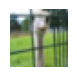

bird




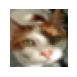

cat




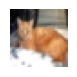

cat




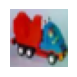

truck




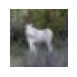

deer




In [3]:
total_number_of_images = x_train.shape[0]
number_of_images = 5 # number of images to display

for i in range(number_of_images):
    nomer_of_image = randint(1, total_number_of_images)
    plt.figure(figsize=(.75, .75))
    plt.imshow(x_train[nomer_of_image])
    plt.axis('off')
    plt.show()

    print(images_classes[y_train[nomer_of_image]])
    print()
    print()

In [4]:
print()
print(f'x_train Shape: {x_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print()
print(f'x_val Shape: {x_val.shape}')
print(f'y_val Shape: {y_val.shape}')
print()
print(f'x_test Shape: {x_test.shape}')
print(f'y_test Shape: {y_test.shape}')


x_train Shape: (40000, 32, 32, 3)
y_train Shape: (40000,)

x_val Shape: (10000, 32, 32, 3)
y_val Shape: (10000,)

x_test Shape: (10000, 32, 32, 3)
y_test Shape: (10000,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.3884 - loss: 1.7634 - val_accuracy: 0.4825 - val_loss: 1.5045
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 30ms/step - accuracy: 0.5323 - loss: 1.3139 - val_accuracy: 0.5398 - val_loss: 1.3859
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.5925 - loss: 1.1548 - val_accuracy: 0.6337 - val_loss: 1.1036
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.6257 - loss: 1.0769 - val_accuracy: 0.6714 - val_loss: 0.9499
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.6470 - loss: 1.0031 - val_accuracy: 0.5654 - val_loss: 1.3574
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.6621 - loss: 0.9615 - val_accuracy: 0.6543 - val_loss: 1.0403
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.6747 - loss: 0.9360 - val_accuracy: 0.6219 - val_loss: 1.1150


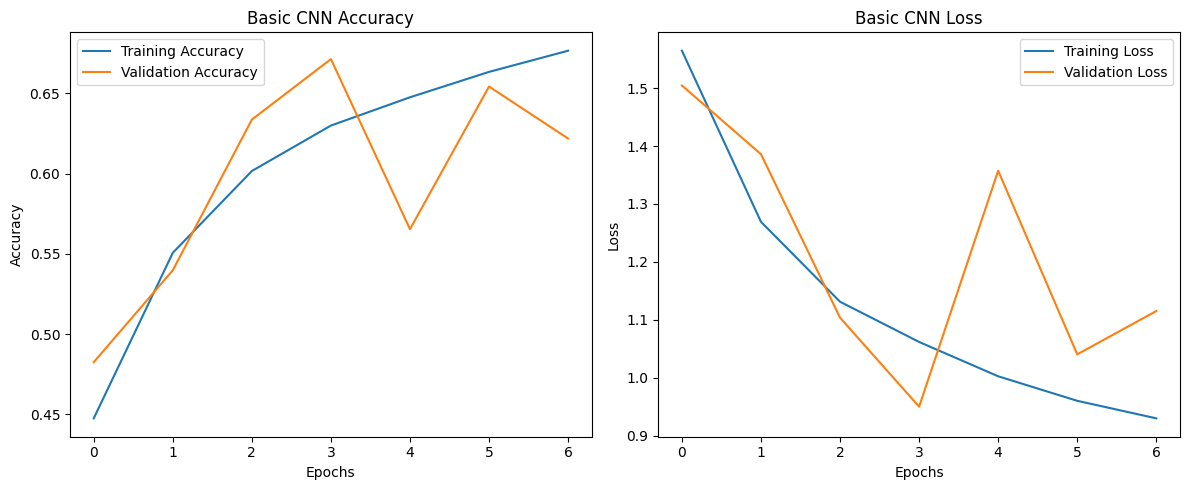

In [5]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from datetime import datetime
from itertools import product
from keras.applications import VGG16, ResNet50, MobileNetV2
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shutil
from PIL import Image

# Define a simple CNN model for baseline performance
def build_basic_cnn(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Train and evaluate the basic CNN model
input_shape = (32, 32, 3)
batch_size = 32

# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1
)
datagen.fit(x_train)

basic_cnn = build_basic_cnn(input_shape, num_classes)
basic_cnn.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
basic_history = basic_cnn.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                              validation_data=(x_val, y_val),
                              epochs=25,
                              callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
                              verbose=1)

# Plot training and validation accuracy/loss for basic CNN
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(basic_history.history['accuracy'], label='Training Accuracy')
plt.plot(basic_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(basic_history.history['loss'], label='Training Loss')
plt.plot(basic_history.history['val_loss'], label='Validation Loss')
plt.title('Basic CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 46ms/step - accuracy: 0.2084 - loss: 2.0330 - val_accuracy: 0.3976 - val_loss: 1.5593 - learning_rate: 1.0000e-04
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.4030 - loss: 1.5538 - val_accuracy: 0.5194 - val_loss: 1.2611 - learning_rate: 1.0000e-04
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.5077 - loss: 1.3209 - val_accuracy: 0.5917 - val_loss: 1.1492 - learning_rate: 1.0000e-04
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.5847 - loss: 1.1507 - val_accuracy: 0.6136 - val_loss: 1.0834 - learning_rate: 1.0000e-04
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6319 - loss: 1.0284 - val_accuracy: 0.6797 - val_loss: 0.9085 - learning_rate: 1.0000e-04
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6730 - loss: 0.9305 - val_accuracy: 0.7130 - val_loss: 0.8112 - learning_rate: 1.0000e-04
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━

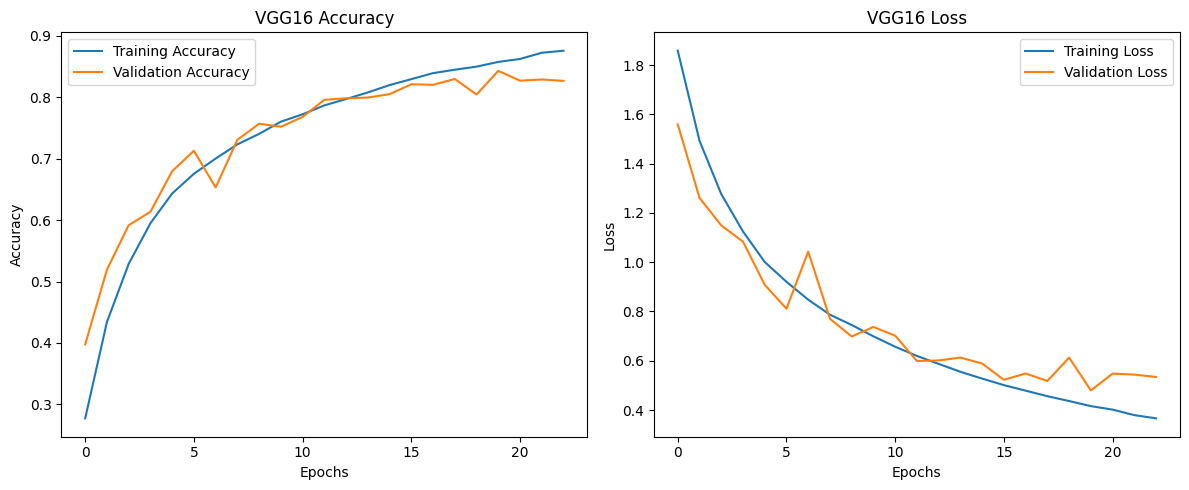

In [6]:
def build_model(base_model, num_classes, input_shape):
    base_model = base_model(input_shape=input_shape, include_top=False, weights=None)
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Set parameters
input_shape = (32, 32, 3)
batch_size = 32
epochs = 25

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# Train and evaluate VGG16 models
models_histories = {}
models_val_accuracies = {}

# Define vgg16
vgg16_model = build_model(VGG16, num_classes, input_shape)

# Compile model
vgg16_model.compile(optimizer=Adam(learning_rate=1e-3),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train vgg16 and save history
vgg16_history = vgg16_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                validation_data=(x_val, y_val),
                epochs=epochs,
                batch_size=batch_size,
                callbacks=[early_stopping, reduce_lr],
                verbose=1)
models_histories['VGG16'] = vgg16_history
models_val_accuracies['VGG16'] = max(vgg16_history.history['val_accuracy'])

# Plot training and validation accuracy/loss for vgg16
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("VGG16 Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['loss'], label='Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss')
plt.title(f"VGG16 Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.2880 - loss: 2.0563 - val_accuracy: 0.4282 - val_loss: 1.5846 - learning_rate: 1.0000e-04
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.4405 - loss: 1.5518 - val_accuracy: 0.4693 - val_loss: 1.4562 - learning_rate: 1.0000e-04
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.4811 - loss: 1.4321 - val_accuracy: 0.5486 - val_loss: 1.2821 - learning_rate: 1.0000e-04
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.5248 - loss: 1.3290 - val_accuracy: 0.5615 - val_loss: 1.2399 - learning_rate: 1.0000e-04
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.5592 - loss: 1.2339 - val_accuracy: 0.5922 - val_loss: 1.1241 - learning_rate: 1.0000e-04
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.5936 - loss: 1.1531 - val_accuracy: 0.6066 - val_loss: 1.1127 - learning_rate: 1.0000e-04
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 38ms/

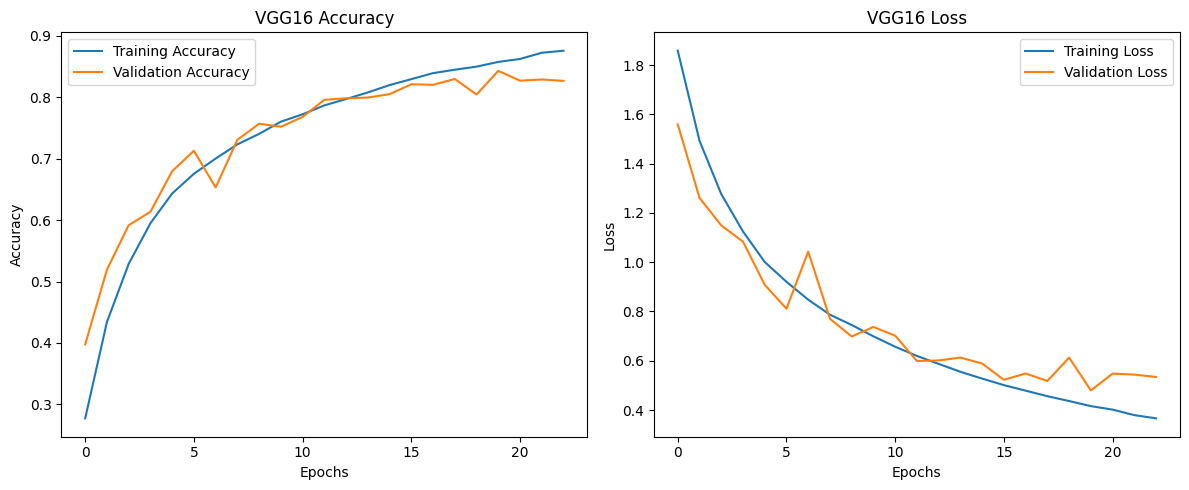

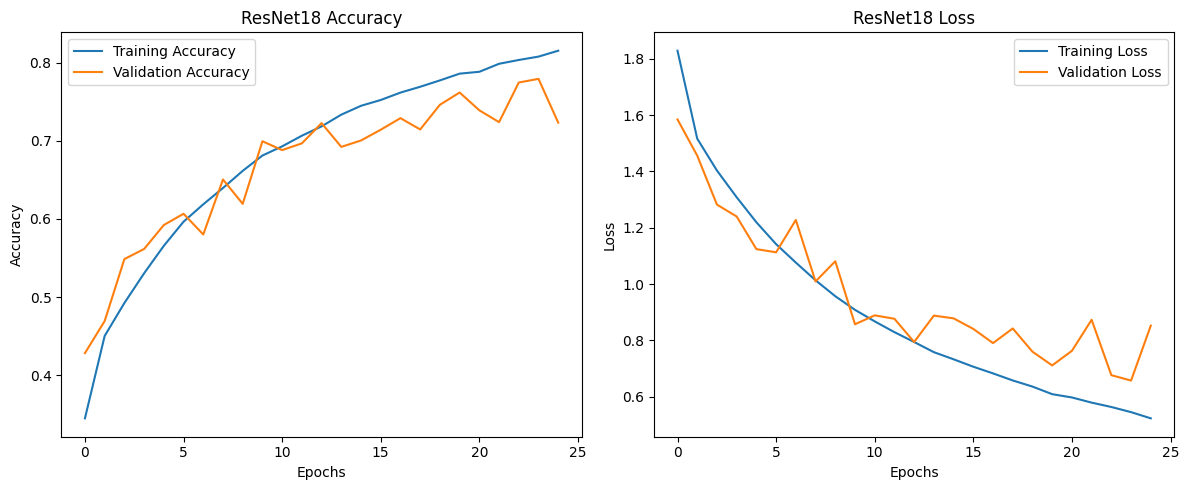

In [16]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

def residual_block(x, filters, downsample=False):
    # If downsampling is required
    shortcut = x

    if downsample or x.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=2 if downsample else 1, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Convolutional layer of the main path
    x = Conv2D(filters, (3, 3), strides=2 if downsample else 1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # residual connection
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x


def build_resnet18(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # initial convolution layer
    x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # residual block
    x = residual_block(x, 64)
    x = residual_block(x, 64, downsample=True)
    x = residual_block(x, 128)
    x = residual_block(x, 128, downsample=True)
    x = residual_block(x, 256)
    x = residual_block(x, 256, downsample=True)
    x = residual_block(x, 512)
    x = residual_block(x, 512, downsample=True)

    # global average pooling layer
    x = GlobalAveragePooling2D()(x)

    # output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model


# Define model
resnet18_model = build_resnet18(input_shape=input_shape, num_classes=num_classes)

# Compile model
for model in [resnet18_model]:
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train model and save history
for model_name, model in zip(['ResNet18'], [resnet18_model]):
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping, reduce_lr],
                        verbose=1)
    models_histories[model_name] = history
    models_val_accuracies[model_name] = max(history.history['val_accuracy'])

# Plot training and validation accuracy/loss for model
for model_name, history in models_histories.items():
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{model_name} Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{model_name} Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [17]:
# Select the best model based on validation accuracy
best_model_name = max(models_val_accuracies, key=models_val_accuracies.get)
print(f"Best model based on validation accuracy: {best_model_name} with accuracy: {models_val_accuracies[best_model_name]:.4f}")

Best model based on validation accuracy: VGG16 with accuracy: 0.8431


In [ ]:
from keras.optimizers import Adam, Nadam

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Hyperparameter tuning on the best model
learning_rates = [1e-5, 1e-4, 5e-4]
optimizers = [Adam, Nadam]

best_vgg16_val_acc = 0
best_tuned_vgg16_model = None
best_tuned_vgg16_history = None
best_tuned_vgg16_params = {}

for lr, opt in product(learning_rates, optimizers):
    print(f"Tuning with model name: VGG16, learning rate: {lr}, optimizer: {opt.__name__}")
    model = build_model(VGG16, num_classes, input_shape)
    model.set_weights(model.get_weights())
    model.compile(optimizer=opt(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping, reduce_lr],
                        verbose=1)
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_vgg16_val_acc:
        best_vgg16_val_acc = val_acc
        best_tuned_vgg16_model = model
        best_tuned_vgg16_history = history
        best_tuned_vgg16_params = {'learning_rate': lr, 'optimizer': opt.__name__}

best_resnet18_val_acc = 0
best_tuned_resnet18_model = None
best_tuned_resnet18_history = None
best_tuned_resnet18_params = {}

for lr, opt in product(learning_rates, optimizers):
    print(f"Tuning with model name: ResNet18, learning rate: {lr}, optimizer: {opt.__name__}")
    model = build_resnet18(input_shape=input_shape, num_classes=num_classes)
    model.set_weights(model.get_weights())
    model.compile(optimizer=opt(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping, reduce_lr],
                        verbose=1)
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_resnet18_val_acc:
        best_resnet18_val_acc = val_acc
        best_tuned_resnet18_model = model
        best_tuned_resnet18_history = history
        best_tuned_resnet18_params = {'learning_rate': lr, 'optimizer': opt.__name__}



In [ ]:
print(f"Best tuned vgg16 model based on validation accuracy: lr: {best_tuned_vgg16_params['learning_rate']}, opt: {best_tuned_vgg16_params['optimizer']} with accuracy: {best_vgg16_val_acc}")
print(f"Best tuned resnet18 model based on validation accuracy: lr: {best_tuned_resnet18_params['learning_rate']}, opt: {best_tuned_resnet18_params['optimizer']} with accuracy: {best_resnet18_val_acc}")

In [ ]:
# Evaluate the best tuned model on the test set
test_loss, test_acc = best_tuned_model.evaluate(x_test, y_test, verbose=0)
print(f"Best Tuned Model Test Accuracy: {test_acc}")
